# Task 1 - Exploration of customer purchasing behavior

- Data Cleaning
- Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?
- Check & compare sales behavior before, during, and after holidays
- Find out any seasonal (Christmas, Easter, etc) purchase behaviors,
- What can you say about the correlation between sales and the number of customers?
- How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?
- Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
- Trends of customer behavior during store opening and closing times
- Which stores are open on all weekdays? How does that affect their sales on weekends? 
- How does the assortment type affects sales?
- How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?
- How does the opening or reopening of new competitors affect stores? 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import os
import sys
sys.path.append(os.path.abspath(os.path.join('..','src')))
from eda import EDA
from utility import ANALYSIS


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading file and initializing the class

# store file
eda = EDA('../store.csv')
store = eda.get_dataframe()

In [3]:
# get overview on the data
print(f'Shape of the dataframe: {store.shape}\n')
print('Info on the dataframe')
store.info()

AttributeError: 'EDA' object has no attribute 'shape'

In [4]:
# understanding the null value of each columns

'''
If Promo2 is 0, then PromoInterval,
Promo2SinceWeek and 
Promo2SinceYear are null,
therefore relace NaN by 0; 
0 stands for no Promo2.

Replace CompetitionDistance,CompetitionOpenSinceMonth and
CompetitionOpenSinceYear null values by 0;
0 stands for unknown month and year.

'''

# columns containing null values
null_columns = store.columns[store.isna().any()].tolist()

# call function in EDA to replace null with 0
for col in null_columns:
    eda.fill_null(col)

# check
store.isna().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool

In [5]:
# test file
eda = EDA('../test.csv')
test = eda.get_dataframe()


# get overview on the data
print(f'Shape of the dataframe: {test.shape}\n')
print('Info on the dataframe')
test.info()

Shape of the dataframe: (41088, 8)

Info on the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [6]:
# remove null values 
eda.remove_null()

# check 
test.isna().any()

Id               False
Store            False
DayOfWeek        False
Date             False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [7]:
# store file
eda = EDA('../train.csv')
train = eda.get_dataframe()

print(f'Shape of the dataframe: {train.shape}\n')
print('Info on the dataframe')
train.info()

Shape of the dataframe: (1017209, 9)

Info on the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
#merge train with store
train_stroe = store.merge(train, on='Store')
test_store = store.merge(test,on='Store')

# export for further analysis
train_stroe.to_csv('train_store.csv')
test_store.to_csv('test_store.csv')

## Task 1 Analysis

> Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [9]:
'''
Date: DateTime
Store: Object
Promo: Category
Open: Category
SchoolHoliday: Category
Store: Object
Promo2: category
CompetitionOpenSinceMonth: category
CompetitionOpenSinceYear: category
Promo2SinceWeek: category
Promo2SinceYear: category

'''
train_store = pd.read_csv('train_store.csv',index_col=False)
test_store = pd.read_csv('test_store.csv',index_col=False)

# call class ANALYSIS
anal = ANALYSIS(train_store,test_store)

# change datatpes
anal.change_dataType('train')
anal.change_dataType('test')

In [10]:
# Category feature distribution in training set
anal.dist_similar()

Promo distribution in train and test set has P-Value of 0.03645245015332306
Promo2 distribution in train and test set has P-Value of 0.1050622358683913
Open distribution in train and test set has P-Value of 0.4283597637153419
SchoolHoliday distribution in train and test set has P-Value of 0.02095217923678624
StateHoliday distribution in train and test set has P-Value of 0.5733159850911269


- Promo and SchooldHoliday isn't distributed differently in train and test dataset.
- Promo2,  Open and StateHoliday are consistent in both sets.

> Check & compare sales behavior before, during, and after holidays

  HolidayPeriod        Sales
0         After  7033.734732
1        Before  6912.737301
2        During   258.159581
3   Non-Holiday  5943.097345
ANOVA P-Value: 0.32626258315598167


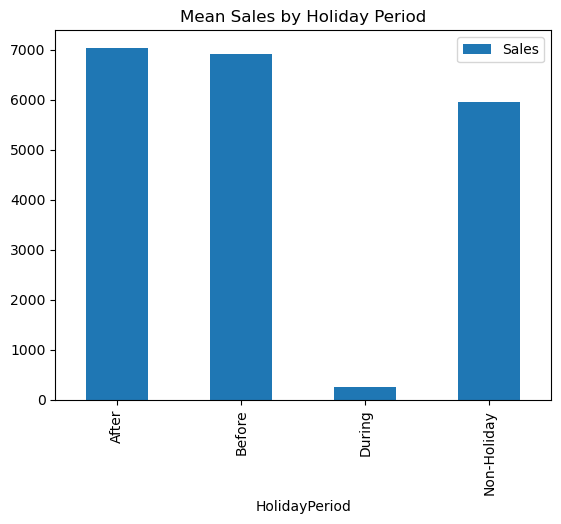

In [11]:
# get the dataframes
anal.sale_behavior()

- Sales is high after seven days before and after holiday.
- Sales during holidays is low by average might be related to the fact most people stay home and most stores are closed on these days.
- People tend to buy more during holiday weeks than those that are not.
- The ANOVA p-values is greater than 0.05 which indicated there is a signifcant difference in sales between these periods.

> Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

  StateHoliday        Sales
0            0  5947.483893
1            a   290.735686
2            b   214.311510
3            c   168.733171


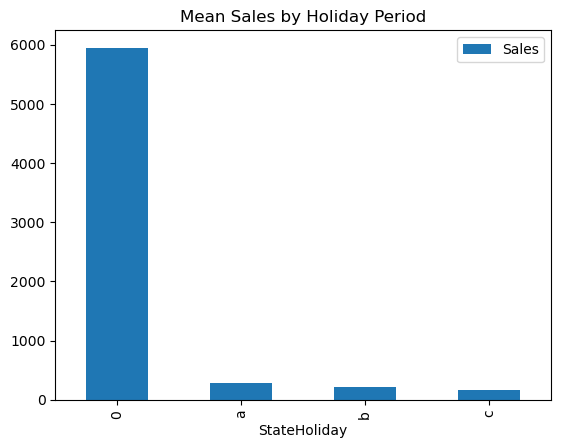

In [12]:
# seasonal behaviour
'''
a: Public holiday,
b: Eastern
c: Christmas
0: None
'''
anal.sale_seasonal_behavior()

- During the holidays the average sales drops thus could be due to many store being closed

In [13]:
# considering open stores
train_df,_ = anal.get_dataframe()

new_df = train_df[(train_df['StateHoliday'] != 0) & (train_df['Open'] == 1)]
new_df.groupby('StateHoliday')['Sales'].mean().reset_index()

,StateHoliday,Sales
0,0,6953.515034
1,a,8487.471182
2,b,9887.889655
3,c,9743.746479


Buiness insights:
- Easter has the highest average sales than the rest thus promotion on this day would yield a high values.

> What can you say about the correlation between sales and the number of customers?

              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


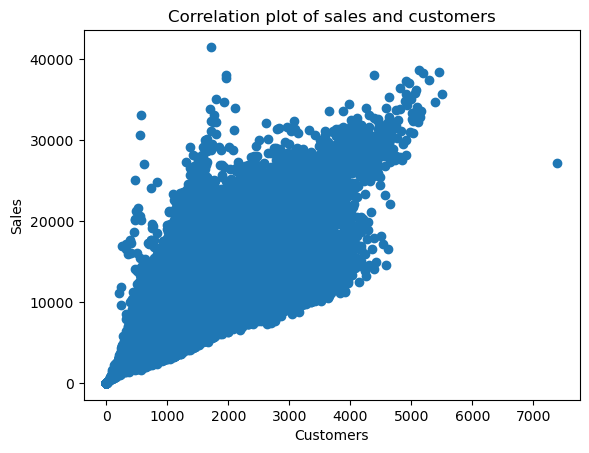

In [14]:
anal.sale_customer_corr()

- It's understood as the number of customers increases the sale also increases.

> How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [15]:
train_df,_ = anal.get_dataframe()


In [18]:
train_df.groupby('Promo')['Customers'].sum()

Promo
0    325777807
1    318263948
Name: Customers, dtype: int64

- It can be seen that on promo days eventhough the number of customers is less their is a highamount of sales.

In [20]:
anal.promo_sale_behavior()

Sales during promo and non-promo days
Promo
0    2771974337
1    3101206286
Name: Sales, dtype: int64
Number of Customer during promo and non-promo days
Promo
0    325777807
1    318263948
Name: Customers, dtype: int64
Stores with promo existing and new customers
Number of existing customers: 325777807
Number of customers on promotion day: 318263948
Number of new customers: -7513859


- There is a decline of cutomers during promo days.

> Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

The above analysis indicated, number of customers is low in promo days than other days.

The question is "Could this be related to the day the promo happens?"

In [21]:
# add a day name column
anal.day_name()

# days of the week promo happens
anal.promo_days_behavior()

     dayName  number_of_promo        sales   customers
0     Friday            77580  7202.540577  767.023614
1     Monday            77760  9707.808423  937.150694
2   Thursday            77580  7259.497280  774.028048
3    Tuesday            77580  8227.909603  836.444625
4  Wednesday            77580  7554.021384  785.575509


- Promotion happen on weekdays which most people are busy.
- Extending promotion or making the promo happen on weekends would be effective.

In [22]:
# store type promo 
anal.store_promo_deploy()

  StoreType  number_of_promo         sales    customers  sale_per_customer
0         a           210504   8068.080939   870.600207           9.267263
1         b             6046  11109.739497  2113.734039           5.255978
2         c            52244   7810.174738   859.572372           9.086117
3         d           119286   7776.593414   648.122890          11.998640


- StoreType D: Given its high sales per customer but low overall footfall, promotions could be used to attract more customers and capitalize on its revenue efficiency. Promos here could focus on increasing foot traffic while maintaining or enhancing the current customer spending.
- StoreType B: This store already has high traffic but low sales per customer. Promos could be designed to increase the basket size per customer (e.g., discounts on bundled products or loyalty rewards).
- StoreType A and C: Both have moderate traffic and sales efficiency. Promotions could help drive both footfall and sales, depending on the store’s specific customer base. These could be general promotions aimed at increasing overall traffic and maintaining the current efficiency.

> Trends of customer behavior during store opening and closing times

     dayName        sales    customers
0     Friday  7072.677012   781.771639
1     Monday  8216.073074   855.444984
2   Saturday  5874.840238   660.177526
3     Sunday  8224.723908  1441.532424
4   Thursday  6767.310159   755.569784
5    Tuesday  7088.113656   769.986753
6  Wednesday  6728.122978   740.598876


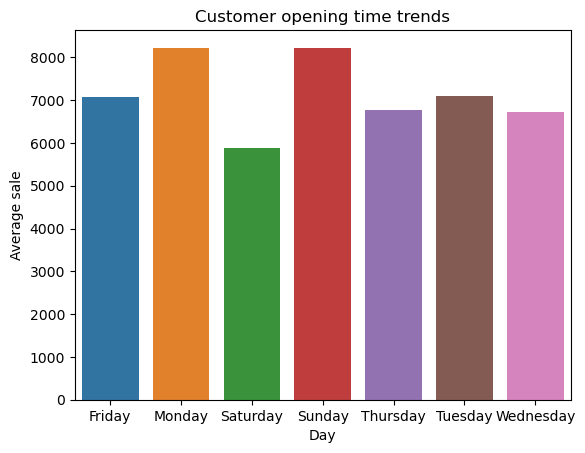

In [23]:
# customer trends on opening time and day of week
anal.customer_time_behaviour()

- Stores open on Monday and Sunday have the two highest average sales.


> Which stores are open on all weekdays? How does that affect their sales on weekends? 

In [24]:
# weekdays and weekends behavior of stores
anal.weekdays_weekends_behaviour()

All stores are open weekdays
Weedays average sales: 6866.806350816009
Weedays average number of customers: 747.1785945428987
Weekends average sales: 3025.872894355006
Weekends average number of customers: 346.4495267048988


> Check how the assortment type affects sales

  Assortment        Sales
0      Basic  5481.026096
1      Extra  8553.931999
2   Extended  6058.676567


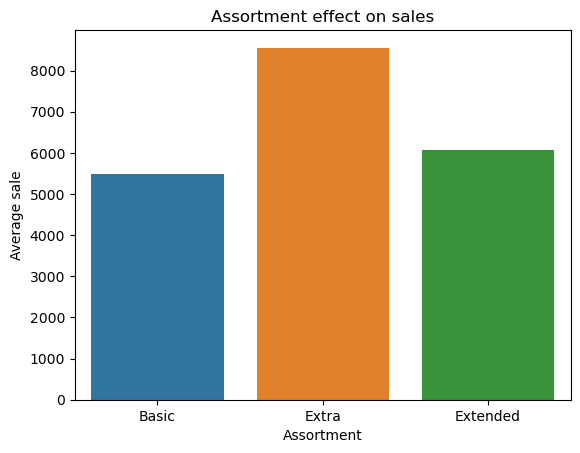

In [25]:
# effect of assortment on sale
anal.assortment_on_sale()

> How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

Stores with greater than average competitor distance has average sales: 5670.018395928726
Stores with less than average competitor distance has average sales: 5816.806085494991


Stores with greater than average competitor distance has average number of customers: 540.0983376525721
Stores with less than average competitor distance has average number of customers: 671.6799144188168




Stores with greater than average competitor distance has promotion sales: 900584121
Stores with less than average competitor distance has promotion sales: 2200622165


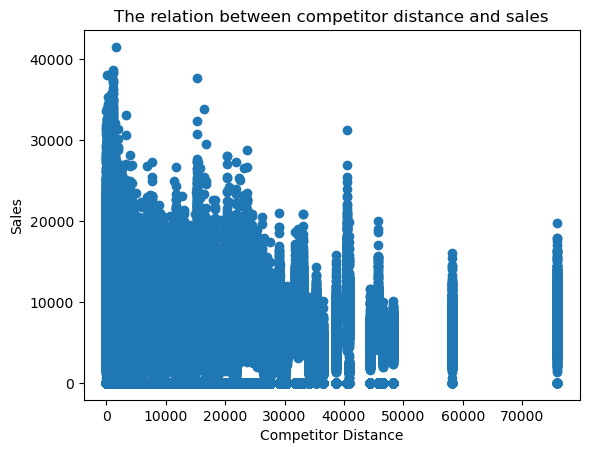

In [26]:
# sales behaviour with respect to competitor distance
anal.competitor_distance_sale_behavior()

> How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

In [27]:
store_no_comptetiors = store[store['CompetitionDistance'] == 0]['Store'].unique().tolist()

# check if they have a change in competitor distance
for sto in store_no_comptetiors:
    sum = train_df[train_df['Store'] == sto]['CompetitionDistance'].sum()
    print(f"Store id {sto}  has no competitors initally then now has {sum} competitor distance")

Store id 291  has no competitors initally then now has 0.0 competitor distance
Store id 622  has no competitors initally then now has 0.0 competitor distance
Store id 879  has no competitors initally then now has 0.0 competitor distance


- The stores which didn't have competitor or NA values initial, doesn't have competitor currently too.

In [ ]:
eda.close_logs()
anal.close_logs()